## Primera Entrega - Curso Data Science (CoderHouse)
### Maite Ugalde

- Antecedentes

En la actualidad, en Argentina el acceso a la educación primaria y secundaria es un derecho y obligación sin embargo, la deserción escolar aumenta a medida que se avanza en los niveles educativos. En poblaciones con menores recursos, especialmente en áreas rurales o más alejadas, la desigualdad en el acceso a la educación es más pronunciada, agravada por factores económicos y sociales. Esto genera una brecha educativa que se refleja en la empleabilidad y el ingreso a lo largo del tiempo, reforzando las desigualdades socioeconómicas estructurales. Según la Encuesta Permanente de Hogares (EPH), los niveles de informalidad laboral y el acceso desigual a servicios educativos y de salud son mayores en áreas rurales y pequeñas ciudades.

Para intentar mejorar las perspectivas socioeconómicas a largo plazo, es clave entender el nivel educativo de la sociedad, ya que la educación es uno de los principales motores de movilidad social y un determinante clave del desarrollo económico y social. Aquellos con niveles educativos más bajos tienden a tener empleos informales, menores ingresos y acceso limitado a oportunidades, perpetuando ciclos de pobreza e inestabilidad laboral.

- Objetivo

Dado que las condiciones socioeconómicas suelen ser una de las consecuencias del nivel educativo de los adultos, el presente modelo intentará explorar cómo el nivel educativo de los adultos impacta en diversas variables socioeconómicas, y cómo estas varían según el lugar de residencia de la persona. Es decir, teniendo una persona con X condiciones socioeconómicas (empleo, los ingresos, la vivienda y el acceso a servicios de salud), ¿cuál es la probabilidad de que cuente con cierto nivel educativo? ¿Cómo varían estas probabilidades según el lugar de la Argentina de residencia?


- Fuente de datos

Encuesta Permanente de Hogares - Instituto Nacional de Estadística y Censos (INDEC)
Primer trimestre 2024.
Disponible en: https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos

In [200]:
#Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Primera Exploración

In [15]:
# Importación del dataset - El documento con la raw data puede accederse desde el repositorio de GitHub habiendolo cargado previamente allí.
url = 'https://github.com/maiteuen/CoderHouse/raw/main/Entregas%20CODER/usu_individual_T124.xlsx'
eph = pd.read_excel(url)
eph.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


### 2. Construcción del DataFrame con la información necesaria para este estudio

Como mucha de la informacion que provee este dataset no la tendremos en cuenta para este trabajo, contruyo mi DataFrame con las columnas necesarias y renombro las columnas para más claridad. A su vez, este dataset presenta información sobre las horas trabajadas en el trabajo principal y las horas trabajadas en el trabajo secundario (si tiene). Pero yo quiero saber las horas trabajadas totales, así que crearé otra columna que sume a estas dos.

In [161]:
df = pd.DataFrame(eph[['MAS_500','AGLOMERADO','CH04','CH06','CH07','CH08','CH15','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC','PP03D','PP3E_TOT','PP3F_TOT','PP03G','PP04B_COD','PP04B3_ANO','PP08D1','PP10A','ITF']])
df['HS TRABAJADAS SEMANALES'] = df['PP3E_TOT'] + df['PP3F_TOT']
df.rename(columns={'CH04': 'SEXO','CH06':'AÑOS','CH07':'ESTADO CIVIL','CH08':'COBERTURA MÉDICA','CH15':'LUGAR DE NACIMIENTO','ESTADO':'ESTADO LABORAL','PP03D':'CANT. DE OCUPACIONES','PP03G':'MÁS TRABAJO?','PP04B_COD':'RUBRO EMPRESA','PP04B3_ANO':'ANTIGÜEDAD','PP08D1':'SUELDO INDIVIDUAL','PP10A':'TIEMPO BUSCANDO EMPLEO','ITF':'INGRESO TOTAL FAMILIAR'}, inplace=True)
df.head()


,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,NaN,0,30.0
1,S,10,2,22,5,1,1,5,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,S,10,2,3,5,1,1,7,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,NaN,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,NaN,850000,20.0


Significado de cada columna:

VER SEGUN RESPUESTA JENNIFER Y LOS VALORES QUE PUEDEN TOMAR

In [162]:
#Informacion sobre las columnas y variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MAS_500                  46050 non-null  object 
 1   AGLOMERADO               46050 non-null  int64  
 2   SEXO                     46050 non-null  int64  
 3   AÑOS                     46050 non-null  int64  
 4   ESTADO CIVIL             46050 non-null  int64  
 5   COBERTURA MÉDICA         46050 non-null  int64  
 6   LUGAR DE NACIMIENTO      46050 non-null  int64  
 7   NIVEL_ED                 46050 non-null  int64  
 8   ESTADO LABORAL           46050 non-null  int64  
 9   CAT_OCUP                 46050 non-null  int64  
 10  CAT_INAC                 46050 non-null  int64  
 11  CANT. DE OCUPACIONES     20325 non-null  float64
 12  PP3E_TOT                 20325 non-null  float64
 13  PP3F_TOT                 20325 non-null  float64
 14  MÁS TRABAJO?          

Como sólo me voy a basar en las personas que legalmente pueden trabajar, me quedaré con las personas mayores de edad:

In [163]:
df_filtered1 = df[df['AÑOS'] >= 18]

A su vez, sólamente quiero tener en cuenta las personas laboralmente activas (por más que estén desempleados), ya que tendré información sobre el sueldo, antigüedad laboral, horas trabajadas semanales, etc., porque justamente son estas variables las que tendré en cuenta para mi trabajo.

In [164]:
(df_filtered1['ESTADO LABORAL'] == 3).sum()

13067

Estas personas se encuentras 'Inactivas', lo que significa que por alguna razón no están trabajando pero tampoco buscando empleo. Muchos de ellos podrian encontrarse estudiando exclusivamente o ser ya jubilados. Vamos a comprobarlo:

In [165]:
df_inactivos = df_filtered1[df_filtered1['ESTADO LABORAL'] == 3]
result = df_inactivos[['ESTADO LABORAL', 'CAT_INAC']].groupby('CAT_INAC').agg({'CAT_INAC': 'count'}).copy()
result

,CAT_INAC
CAT_INAC,
1,4735
2,101
3,2389
4,4430
6,437
7,975


In [185]:
#Con toda esta información vuelvo a definir a mi df
df = df_filtered1[df_filtered1['ESTADO LABORAL'] != 3].copy()
df.count()

MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       20242
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               20242
RUBRO EMPRESA              20242
ANTIGÜEDAD                 20242
SUELDO INDIVIDUAL          20242
TIEMPO BUSCANDO EMPLEO      1341
INGRESO TOTAL FAMILIAR     21658
HS TRABAJADAS SEMANALES    20242
dtype: int64

In [167]:
# Cuento vacíos Cant. de Ocupaciones para comprobar valores
df['CANT. DE OCUPACIONES'].isnull().value_counts()

CANT. DE OCUPACIONES
False    20242
True      1416
Name: count, dtype: int64

In [186]:
# Quienes son? 
df.loc[df['CANT. DE OCUPACIONES'].isnull() == True]

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
61,N,19,2,23,5,4,1,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,600000,NaN
111,S,4,2,43,2,1,1,2,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,350000,NaN
210,N,20,1,43,5,4,3,5,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1200000,NaN
334,S,13,1,49,3,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60000,NaN
399,S,33,2,49,2,4,4,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46006,S,29,2,29,1,4,1,4,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,140000,NaN
46042,S,33,1,63,2,1,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN
46046,S,33,1,21,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
46047,S,33,1,20,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Reemplazo los NaN por 0 para no dejarlos afuera

¿Por qué los reemplazo por 0 en vez de quitarlos con un 'dropna'?
Si los quito, perderia informacion sobre, por ejemplo, los desempleados, ya que tienen 0 cantidad de ocupaciones. Según el diseño de la encuesta, sólamente las personas con ocupaciones debían res ponder a este apartado: https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_1T2024.pdf


Algo similar sucede con 'MÁS TRABAJO?', 'RUBRO EMPRESA', 'ANTIGÜEDAD', 'SUELDO INDIVIDUAL', 'HS TRABAJADAS SEMANALES'.
De forma opuesta, sucede con 'TIEMPO BUSCANDO EMPLEO', ya que este apartado es para personas desempleadas. 

In [190]:
# Reemplazo con 0 a los valores vacíos 
df['CANT. DE OCUPACIONES'] = df['CANT. DE OCUPACIONES'].fillna('0')
df['MÁS TRABAJO?'] = df['MÁS TRABAJO?'].fillna('0')
df['RUBRO EMPRESA'] = df['RUBRO EMPRESA'].fillna('0')
df['ANTIGÜEDAD'] = df['ANTIGÜEDAD'].fillna('0')
df['SUELDO INDIVIDUAL'] = df['SUELDO INDIVIDUAL'].fillna('0')
df['HS TRABAJADAS SEMANALES'] = df['HS TRABAJADAS SEMANALES'].fillna('0')
df['TIEMPO BUSCANDO EMPLEO'] = df['TIEMPO BUSCANDO EMPLEO'].fillna('0')

df.count()


MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       21658
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               21658
RUBRO EMPRESA              21658
ANTIGÜEDAD                 21658
SUELDO INDIVIDUAL          21658
TIEMPO BUSCANDO EMPLEO     21658
INGRESO TOTAL FAMILIAR     21658
HS TRABAJADAS SEMANALES    21658
dtype: int64

In [191]:
df.head()

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,0,0,30.0
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,0,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,0,850000,20.0
5,S,10,2,26,5,4,1,6,1,3,...,0.0,40.0,0.0,2.0,5601.0,0.0,200000.0,0,850000,40.0
6,S,10,1,25,5,4,1,5,1,3,...,0.0,48.0,0.0,2.0,3100.0,0.0,200000.0,0,850000,48.0


## 3. Análisis del DataFrame

In [193]:
# Matriz de correlacion
df[['NIVEL_ED','ESTADO LABORAL','AÑOS','SUELDO INDIVIDUAL','INGRESO TOTAL FAMILIAR']].corr(method='pearson').round(3)

,NIVEL_ED,ESTADO LABORAL,AÑOS,SUELDO INDIVIDUAL,INGRESO TOTAL FAMILIAR
NIVEL_ED,1.000,-0.044,-0.066,0.181,0.142
ESTADO LABORAL,-0.044,1.000,-0.131,-0.161,-0.050
AÑOS,-0.066,-0.131,1.000,0.041,0.008
SUELDO INDIVIDUAL,0.181,-0.161,0.041,1.000,0.451
INGRESO TOTAL FAMILIAR,0.142,-0.050,0.008,0.451,1.000


Correlación menor a cero: Si la correlación es menor a cero, significa que es negativa, es decir, que las variables se relacionan inversamente.

Cuando el valor de alguna variable es alto, el valor de la otra variable es bajo. Mientras más próximo se encuentre a -1, más clara será la covariación extrema. Si el coeficiente es igual a -1, nos referimos a una correlación negativa perfecta.

Correlación mayor a cero: Si la correlación es igual a +1 significa que es positiva perfecta. En este caso significa que la correlación es positiva, es decir, que las variables se correlacionan directamente.

Cuando el valor de una variable es alto, el valor de la otra también lo es, sucede lo mismo cuando son bajos. Si es cercano a +1, el coeficiente será la covariación.

In [174]:
Análisis de las variables ----- agrego graficos




SyntaxError: invalid syntax (3227881656.py, line 1)

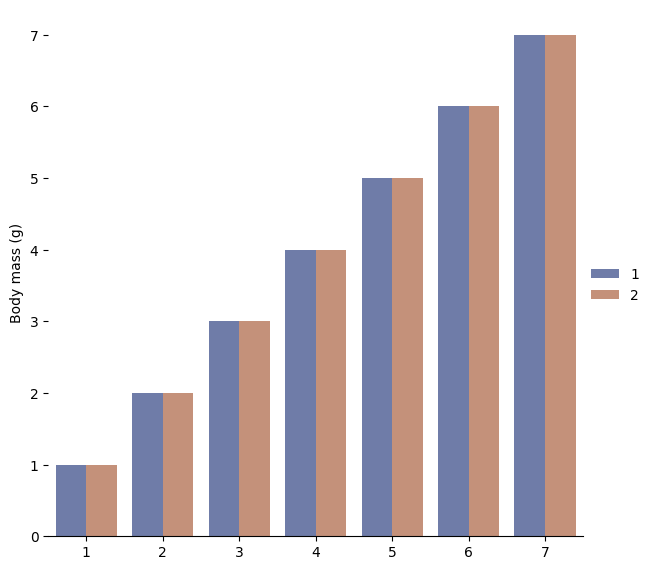

In [214]:
#Gráfico de nivel educativo por sexo
g = sns.catplot(
    data=df, kind="bar",
    x="NIVEL_ED", y="NIVEL_ED", hue="SEXO",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

### COMO HAGO PARA AGRUPAR VALORES????????????????????????????!!!!!!!!!!!!!!!!!

TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

## 4. Conclusiones preliminares

6. Modelo de Predicción: Nivel Educativo y Tipo de Empleo
Objetivo: Predecir el tipo de empleo (formal/informal) según el nivel educativo de los adultos.
Variables:
Dependiente (y): Tipo de empleo (formal/informal).
Independientes (X):
Nivel educativo alcanzado.
Edad.
Ingresos.
Zona geográfica.
Modelo: Clasificación binaria (Regresión logística o Random Forest).
Hipótesis: Las personas con mayor nivel educativo tienden a tener empleos formales, mientras que aquellos con menor nivel educativo tienden a estar en el sector informal.
7. Análisis de Supervivencia: Nivel Educativo y Duración del Desempleo
Objetivo: Analizar el tiempo de desempleo en adultos según su nivel educativo.
Variables:
Dependiente (y): Tiempo en desempleo.
Independientes (X):
Nivel educativo.
Edad.
Ingresos previos.
Condiciones laborales anteriores.
Modelo: Análisis de supervivencia (Kaplan-Meier o Cox).
Hipótesis: Las personas con niveles educativos más bajos tienden a permanecer más tiempo desempleadas en comparación con aquellas con mayor nivel educativo.




Objetivo: Explorar la relación entre el nivel educativo alcanzado y la condición de ocupación (empleado, desempleado, subempleado, inactivo).
Variables:
Dependiente (y): Nivel educativo alcanzado.
Independientes (X):
Condición de ocupación.
Ingreso mensual.
Tipo de empleo (formal o informal).
Modelo: Análisis de correlación (Pearson o Spearman) y regresión logística.
Hipótesis: Las personas con niveles educativos más bajos tienen una mayor probabilidad de estar en el desempleo o en empleos informales y mal remunerados, lo que podría estar relacionado con la decisión de abandonar la escuela.